In [135]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import preprocessing

In [121]:
users = pd.read_pickle('users.pkl')

In [122]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5995 entries, 0 to 8381
Data columns (total 37 columns):
Cat                                   5995 non-null object
bot                                   5995 non-null bool
crawled_at                            5995 non-null datetime64[ns]
created_at                            5995 non-null object
default_profile                       5995 non-null float64
description                           5995 non-null bool
favourites_count                      5995 non-null int64
followers_count                       5995 non-null int64
geo_enabled                           5995 non-null bool
id                                    5995 non-null int64
lang                                  5995 non-null bool
listed_count                          5995 non-null int64
location                              5995 non-null bool
name                                  5995 non-null bool
profile_background_color              5995 non-null bool
profile_backgroun

In [123]:
users.columns

Index(['Cat', 'bot', 'crawled_at', 'created_at', 'default_profile',
       'description', 'favourites_count', 'followers_count', 'geo_enabled',
       'id', 'lang', 'listed_count', 'location', 'name',
       'profile_background_color', 'profile_background_image_url',
       'profile_background_image_url_https', 'profile_background_tile',
       'profile_banner_url', 'profile_image_url', 'profile_image_url_https',
       'profile_link_color', 'profile_sidebar_border_color',
       'profile_sidebar_fill_color', 'profile_text_color',
       'profile_use_background_image', 'screen_name', 'time_zone', 'timestamp',
       'updated', 'url', 'utc_offset', 'tweet_count', 'favs_tiempo',
       'followers_tiempo', 'statuses_tiempo', 'friends_tiempo'],
      dtype='object')

In [124]:
# Quedarnos solamente con las Categorias para modelar
#users = users[(users.Cat=='SocialSpambot1') | (users.Cat=='Humans')]

In [125]:
# Eliminar columnas no utilizables
users = users[['Cat', 'default_profile', 'description', 'geo_enabled', 'lang', 'listed_count', 'location', 'name', 'profile_background_color', 'profile_background_image_url', 'profile_background_image_url_https', 'profile_background_tile', 'profile_banner_url', 'profile_image_url', 'profile_image_url_https', 'profile_link_color', 'profile_sidebar_border_color', 'profile_sidebar_fill_color', 'profile_text_color', 'profile_use_background_image', 'screen_name', 'url','favs_tiempo','followers_tiempo', 'statuses_tiempo','friends_tiempo']]

In [126]:
users.isnull().sum()

Cat                                   0
default_profile                       0
description                           0
geo_enabled                           0
lang                                  0
listed_count                          0
location                              0
name                                  0
profile_background_color              0
profile_background_image_url          0
profile_background_image_url_https    0
profile_background_tile               0
profile_banner_url                    0
profile_image_url                     0
profile_image_url_https               0
profile_link_color                    0
profile_sidebar_border_color          0
profile_sidebar_fill_color            0
profile_text_color                    0
profile_use_background_image          0
screen_name                           0
url                                   0
favs_tiempo                           0
followers_tiempo                      0
statuses_tiempo                       0


In [127]:
# Encodear todos los atributos categóricos como booleanos usando pd.get_dummies
X = pd.get_dummies(users.drop('Cat', axis=1))
atributos = X.columns

In [136]:
X = preprocessing.scale(X, axis = 0)

In [137]:
# Encodear las etiquetas usando LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(users['Cat'])

In [138]:
# Dividir X e y con train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [139]:
# Ajustar un árbol de clasificación con max_depth=3
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_depth=5, random_state=1)
treeclf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

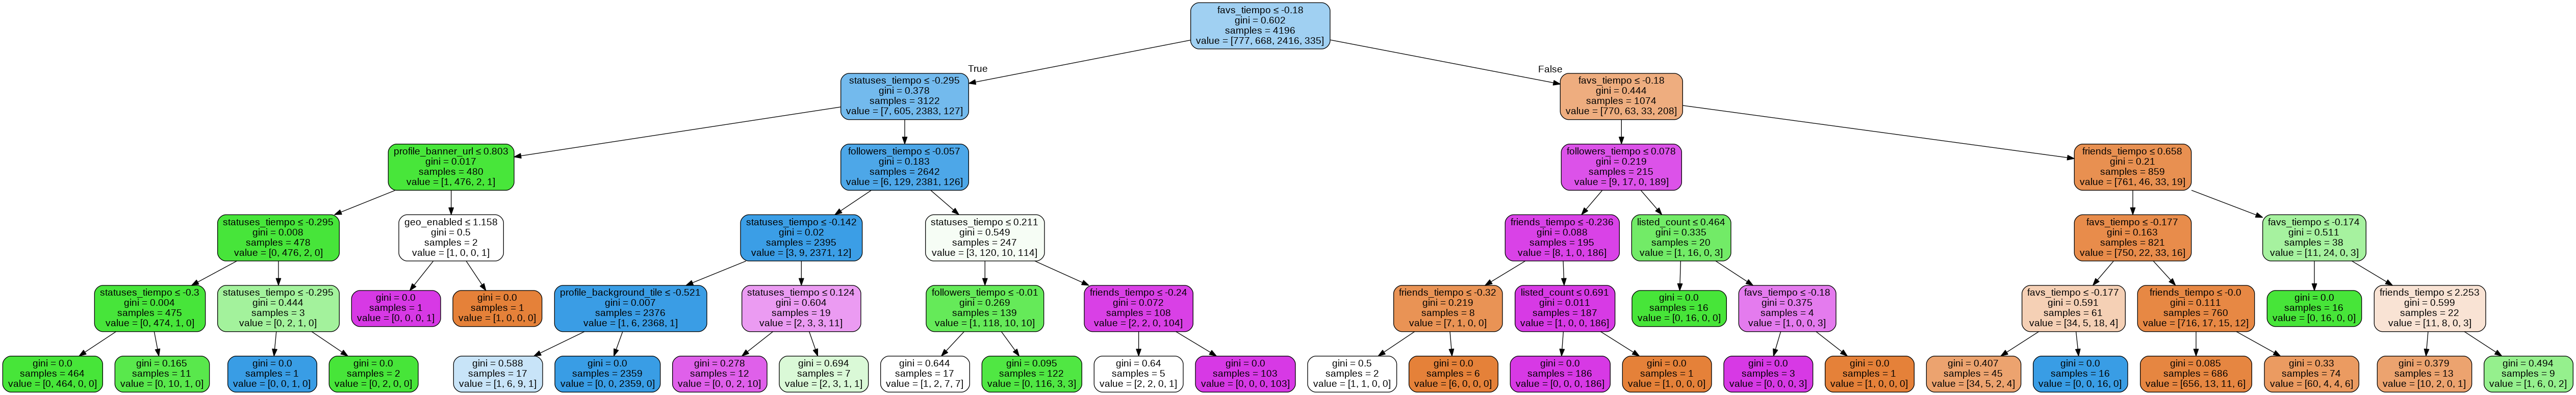

In [140]:
# Visualizar el árbol usando graphviz
dot_data = export_graphviz(treeclf, out_file=None,  
                feature_names=atributos,  
                filled=True, rounded=True,  
                special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [141]:
# Calcular la importancia de los atributos
pd.DataFrame({'Atributo':atributos,
              'importancia':treeclf.feature_importances_}).sort_values('importancia',
                                                                      ascending=False)

,Atributo,importancia
21,favs_tiempo,0.488400
23,statuses_tiempo,0.339520
22,followers_tiempo,0.142839
24,friends_tiempo,0.022021
4,listed_count,0.003032
10,profile_background_tile,0.002513
11,profile_banner_url,0.001253
2,geo_enabled,0.000422
15,profile_sidebar_border_color,0.000000
20,url,0.000000


In [142]:
# Calcular y mostrar la matriz de confusión
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test, treeclf.predict(X_test))
predicted_cols = ['pred_'+c for c in le.classes_]
pd.DataFrame(conf, index = le.classes_, columns = predicted_cols)

,pred_Humans,pred_SocialSpambot1,pred_SocialSpambot2,pred_SocialSpambot3
Humans,300,2,1,3
SocialSpambot1,7,309,3,4
SocialSpambot2,3,4,1032,2
SocialSpambot3,4,7,2,116
